In [1]:
# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


In [2]:
# ipynb形式のライブラリノートを.py形式に変更したものをインポート
import lib
import lib.lab_lib
from lib.lab_lib import *

DEBUG:lib.lab_lib:hello


# 2022年3月22日～

ベンチマークプログラムCGの関数 `VECSET` において、回帰木モデルのチューニングをする

## ✅TODOs

1. ✅VECSETだけのMAPE表を作る
2. ✅githubのissueにある「やること群」をリストアップする

## TODOs２

* 木を出力して確認する
* ノードに含まれるサンプル数のパラメータを確認
* 毎回結果が異なるかもしれないのでそれを固定する＠ハイパーパラメータ
* 入力データがすべて数値データなのを確認
* 交差検証をする（一つのデータをテスト対象にする。すべてのデータをテスト対象とした結果をまとめる。）

In [3]:
import graphviz

benchmark_name = "cg"

classes = ["A", "B", "C", "D", "E", "F"]
processes = [2, 4, 8, 16, 32, 64, 128, 256]


date: str = "2022年3月23日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

# 関数VECSETのみを抽出
functionName: str = "VECSET"
rawDF: pd.DataFrame = rawDF[rawDF["functionName"] == functionName]

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")

df_exp_var: pd.DataFrame = rawDF.filter(items=exp_var)
df_res_var: pd.DataFrame = rawDF.filter(items=res_var)

ndarray_exp_var: np.ndarray = df_exp_var.values
ndarray_res_var: np.ndarray = df_res_var.values

reg_tree = DecisionTreeRegressor(max_leaf_nodes=20)
model_tree: DecisionTreeRegressor = reg_tree.fit(ndarray_exp_var, ndarray_res_var)

DEBUG:graphviz._tools:deprecate positional args: graphviz.backend.piping.pipe(['renderer', 'formatter', 'quiet'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.backend.rendering.render(['renderer', 'formatter', 'quiet'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.backend.unflattening.unflatten(['stagger', 'fanout', 'chain', 'encoding'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.backend.viewing.view(['quiet'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.quoting.quote(['is_html_string', 'is_valid_id', 'dot_keywords', 'escape_unescaped_quotes'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.quoting.a_list(['kwargs', 'attributes'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.quoting.attr_list(['kwargs', 'attributes'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.dot.Dot.clear(['keep_attrs'])
DEBUG:graphviz._tools:deprecate positional args: graphviz.dot.Dot.__iter__(['subgraph'])
DEBUG:graphviz._

exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']


DEBUG:graphviz.backend.execute:run [PosixPath('dot'), '-Kdot', '-Tsvg']


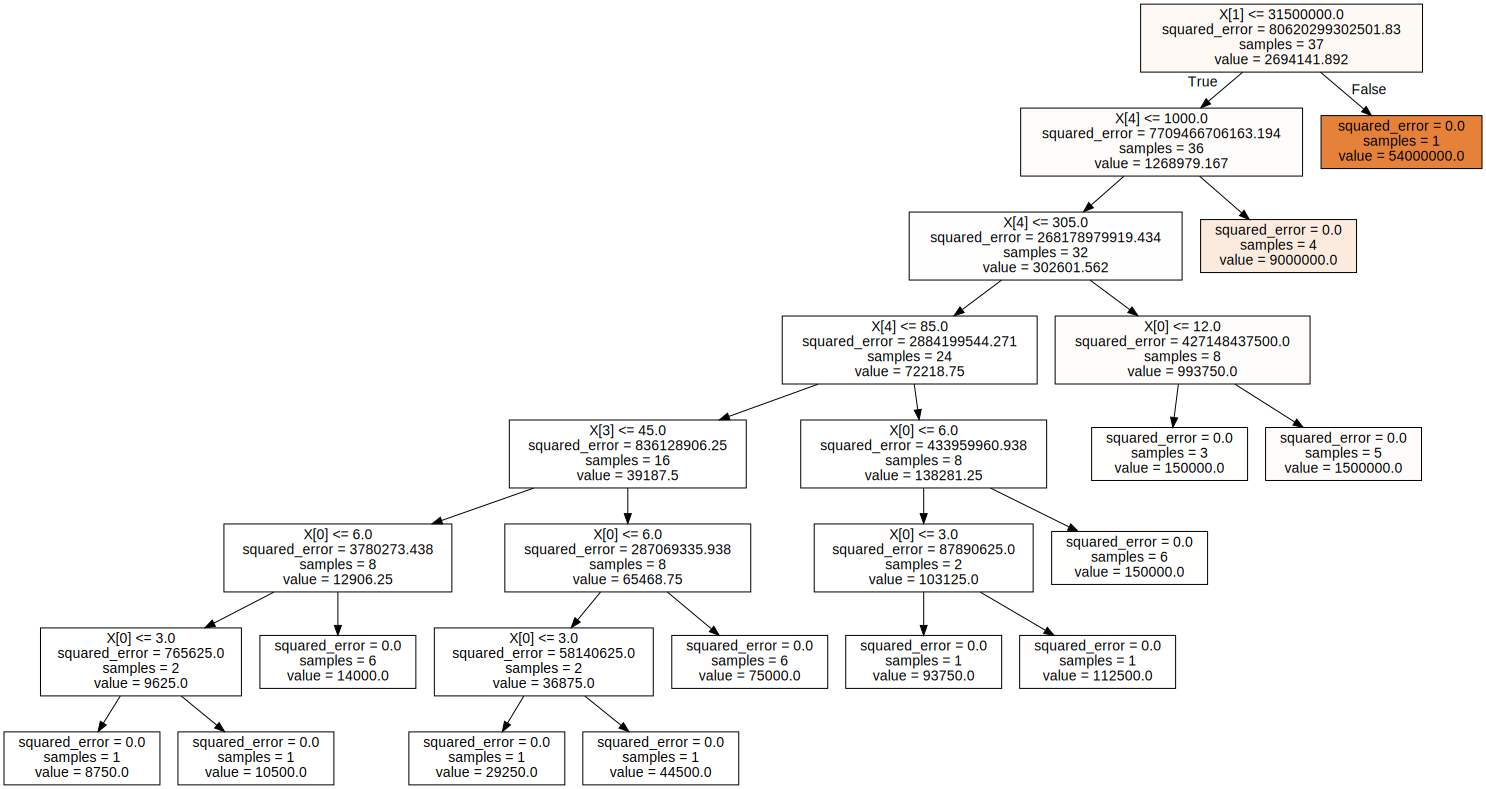

In [4]:
# GraphVizを用いた方法

graph = graphviz.Source(tree.export_graphviz(model_tree, filled=True))
graph

# 2022年3月16日～2022年3月22日

* ✅問題サイズの変数群の線形和をプロセス数で割ったモデルの実装
    * ✅テスト
    * ✅実装
* ✅MAPE表の作成

In [6]:
benchmark_name = "cg"

classes = ["A", "B", "C", "D", "E", "F"]
processes = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    # "modelBasicTree": "回帰木",
}

model_names_list_JP = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date = "2022年3月23日"

# コア数と問題サイズの両方を振る

rawDF = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var = ["functionCallNum"]

print(f"exp_var = {exp_var}")

returned_MAPE_table = return_MAPE_Table_DF_from_rawDF(
    rawDF=rawDF,
    exp_var_list=exp_var,
    res_var_list=res_var,
    model_name_list=model_names_list,
)
df = returned_MAPE_table.rename(columns=dict_column_names_JP)
df = df.set_index("関数名")
df = df.sort_index(axis=0)
df = df.sort_index(axis=1)

df = addLowestMAPEsModelNameColumn(df, version=2, model_name_list=model_names_list_JP)

print(
    df.style.set_precision(2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}における各モデルでのMAPE",
        label=f"{date}allModelsMAPEin{benchmark_name.upper()}",
    )
)

exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']


/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estima

\begin{table}
\caption{ベンチマークプログラムCGにおける各モデルでのMAPE}
\label{2022年3月23日allModelsMAPEinCG}
\begin{tabular}{lrrrrrrrrrrrl}
 & プロセス数を問題サイズで割る & 反比例 & 反比例＆対数 & 反比例＆線形 & 問題サイズをプロセス数で割る & 対数 & 対数＆反比例 & 対数＆線形 & 線形 & 線形＆反比例 & 線形＆対数 & 最適モデル \\
関数名 &  &  &  &  &  &  &  &  &  &  &  &  \\
.TAU_application & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
ALLOC_SPACE & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CG & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CONJ_GRAD & 37.55 & 13.88 & 13.73 & 14.50 & 42.76 & 14.80 & 14.72 & 15.25 & 13.16 & 12.41 & 12.76 & 線形＆反比例 \\
ICNVRT & 159.61 & 662.48 & 2504.27 & 894.57 & 119.98 & 2443.70 & 3811.49 & 815.79 & 502.12 & 6621.01 & 2283.06 & 問題サイズをプロセス数で割る \\
INITIALIZE_MPI & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
MAKEA & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
MPI_B

/tmp/ipykernel_108/2045722184.py:66: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.style.set_precision(2).to_latex(
